In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('StudentsPerformance.csv')

In [3]:
print(df["math score"].dtype) 
# The data type of mathscore is object need to convert into int

object


In [4]:
df['math score'] = df['math score'].str.replace(" ", "", regex=True)  # removes spaces inside numbers like '6 4' → '64'
df['math score'] = pd.to_numeric(df['math score'], errors='coerce')  # converts to float, bad values(like abc) become NaN


In [5]:
print(df["math score"].dtype) 
# The data type of mathscore is int now

int64


# Training Linear Regression Model

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Converting data into 1D matrix Not featue matrix(2D Matrix) beacuse when we will plot the graph then there will be one scatter graph of reading score vs math score and one another graph will be regression line wwhich should be trained on same parameter which is reading score vs math score
# and target vector 

X1 = df[["writing score"]] # double brackets → DataFrame ✔ (2D)
# when we are selecting multiple rows , then we need to pass them in list
Y = df["math score"] 

X2   = df[["reading score"]]

# Spliting the data into training and test 
X1_train,  X1_test, Y1_train, Y1_test = train_test_split(X1,Y,test_size = 0.2, random_state = 42)
X2_train,  X2_test, Y2_train, Y2_test = train_test_split(X2,Y,test_size = 0.2, random_state = 42)



# Creating the model

In [8]:
# Training the model based on writing score
model = LinearRegression()
# Training the model based on reading score
model2 = LinearRegression()

# Training the model using training data


In [9]:
# Training the model based on writing score
model.fit(X1_train, Y1_train)
# Training the model based on reading score
model2.fit(X2_train, Y2_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


# Predicting exam scores using test data


In [10]:
# Predicting math score using writing score
y_pred1 = model.predict(X1_test)
# Predicting math score based on reading score
y_pred2 = model2.predict(X2_test)

# Displaying 5 predicted score

In [11]:
# Predicted math score based on writing score
print(y_pred1[:5])
# Predicted math score based on reading score
print(y_pred2[:5])

[78.91822984 70.12744395 69.32828159 70.12744395 74.12325571]
[80.41742183 63.48683888 69.41254291 72.7986595  77.87783439]


# Scatter plot of actual data
# Regression line on the same graph

In [12]:
import matplotlib.pyplot as plt

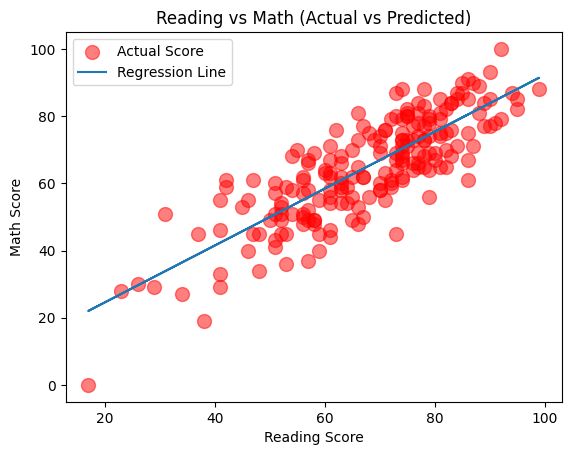

In [13]:
plt.scatter(X2_test,Y2_test,
            color ="Red",
            alpha = 0.5, # Transparency
            s = 100, # Size
            label = "Actual Score"
            )
plt.plot(X2_test, y_pred2, label="Regression Line")
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.title("Reading vs Math (Actual vs Predicted)")
plt.legend() # -> it adds the mention label in small blox 


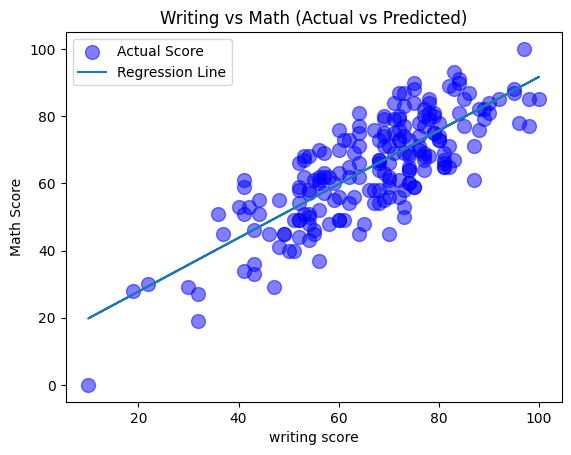

In [15]:
plt.scatter(X1_test,Y1_test,
            color ="Blue",
            alpha = 0.5, # Transparency
            s = 100, # Size
            label = "Actual Score"
            )
plt.plot(X1_test, y_pred1, label="Regression Line")
plt.xlabel("writing score")
plt.ylabel("Math Score")
plt.title("Writing vs Math (Actual vs Predicted)")
plt.legend() # -> it adds the mention label in small blox 


# NOTE : We can't plot 2D graph together with reading score and writing score on same axis